In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from DeepImageSearch import Load_Data, Search_Setup

import os
from PIL import Image 

loc = 'SlumClassifier/assets/model.keras'
PATH = 'SlumClassifier'
IMG_HEIGHT = 512
IMG_WIDTH = 512
model = tf.keras.models.load_model(loc, compile=False)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

test_image_generator = ImageDataGenerator(rescale=1./255)

test_data_gen = test_image_generator.flow_from_directory(
                    PATH,
                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                    batch_size=5,
                    classes=['test'],
                    shuffle=False)

probabilities = model.predict(test_data_gen).flatten()
probabilities
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% Slum")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% Not Slum")
    plt.show()
    
demo_images = [test_data_gen[0][0][i] for i in range(5)] + [test_data_gen[1][0][i] for i in range(5)]
ims = np.array(demo_images)
probs = model.predict(ims).flatten()
ims.shape

Found 10 images belonging to 1 classes.
1/2 [==============>...............] - ETA: 0s

2024-03-01 11:55:42.653968: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 0s 144ms/step


(10, 512, 512, 3)

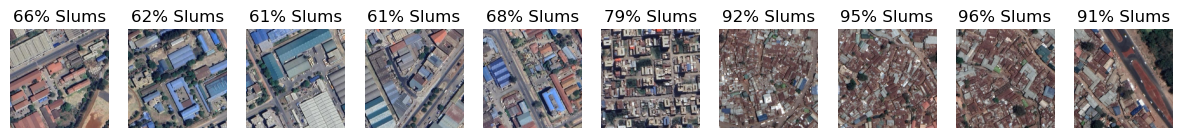

In [7]:
fig, axes = plt.subplots(1, 10, figsize=(15, 15))

for img, probability, ax in zip(demo_images, probabilities, axes):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title("%.0f" % ((probability)*100) + "% Slums")
plt.show()

In [8]:
dl = Load_Data()

not_slum_list = dl.from_folder(["SlumClassifier/train/notslum"])
slum_list = dl.from_folder(["SlumClassifier/train/slum"])